<a href="https://colab.research.google.com/github/bonareri/Customer_Churn_Prediction/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Churn Prediction


 Customer churn refers to the percentage of customers who stop using a company’s services during a specific period.

## Importing the Dependencies

In [ ]:
# Impoting general libraries
import warnings
import itertools
import random
import sklearn

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, PolynomialFeatures

# Class Imbalance
from imblearn.over_sampling import SMOTE

# CV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from imblearn.ensemble import BalancedRandomForestClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import classification_report

import pickle
warnings.filterwarnings(action="ignore")
%matplotlib inline

## Loading Data and Understanding

In [ ]:
# Load the uploaded dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## DATA CLEANING

### **Handling Missing values**
🚨 **Issue with the `TotalCharges` Column**

The `TotalCharges` column should be **numeric (float)** because it represents the total amount a customer has been charged. However, it is stored as **object (string)** instead of a numerical data type.

**🔍 Understanding the Nature of Missing Values**

- Observation: The missing values in TotalCharges occur when tenure = 0.
- Reason: Customers who have just joined (tenure = 0) may not have any total charges yet.
- Solution: These missing values should not be randomly imputed, as they logically represent new customers with no charges yet.



In [ ]:
#return the rows where the TotalCharges column contains an empty string (" ")
df[df['TotalCharges'] ==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#total empty rows
len(df[df['TotalCharges'] ==" "])

11

In [ ]:
# Convert 'TotalCharges' to numeric, setting errors='coerce' to handle empty spaces
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Fill missing values in 'TotalCharges' with 0, since they correspond to tenure = 0
df["TotalCharges"].fillna(0, inplace=True)

In [ ]:
#drop ID column
df = df.drop('customerID', axis=1)

**Insights**
1. Removed customer ID as it is not required for modelling
2. No missing values in the dataset
3. Missing values in the Total Charges column were replaced with 0
4. Class imbalanced identified in the target

## Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Summary Statistics  

#### **2. Mean (Average)**  
- **16.2%** of customers are senior citizens.  
- **Average tenure:** ~32 months.  
- **Average MonthlyCharges:** $64.76.  
- **Average TotalCharges:** $2279.73.  

#### **3. Standard Deviation (Spread of Data)**  
- `SeniorCitizen`: **0.3686** (binary: 0 = Not a senior, 1 = Senior).  
- `tenure`: **24.56** (wide range of customer duration).  
- `MonthlyCharges`: **$30.09** (varied service plans).  
- `TotalCharges`: **$2266.79** (some customers have spent a lot, others very little).  

#### **4. Min & Max Values**  
- `tenure`: **0 - 72 months** (new to long-term customers).  
- `MonthlyCharges`: **$18.25 - $118.75**.  
- `TotalCharges`: **$0 - $8684.80** (new customers likely have $0).  

#### **5. Quartiles (Distribution Overview)**  
- **25% (Q1)**: tenure ≤ **9 months**, TotalCharges ≤ **$398.55**.  
- **50% (Median)**: tenure ≤ **29 months**, TotalCharges ≤ **$1394.55**.  
- **75% (Q3)**: tenure ≤ **55 months**, TotalCharges ≤ **$3786.60**.  

### **Key Insights**  
- Most customers are **not senior citizens**.  
- Many customers are **new (tenure = 0)**.  
- **Wide variation in MonthlyCharges**, suggesting different service levels.  
- Some customers have **TotalCharges = 0**, likely due to recent sign-ups.  



### Numerical Features Analysis

Understanding the distribution of numerical features

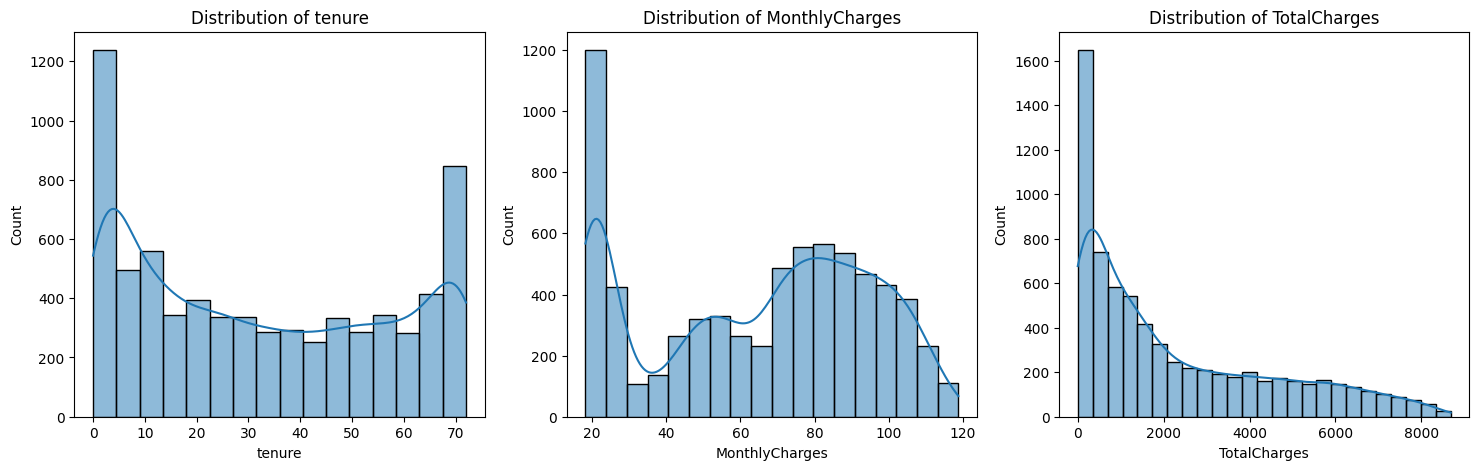

In [ ]:
def plot_numerical_distributions(df):
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Create 3 subplots in one row

    for i, col in enumerate(numerical_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i])  # Drop NaN values
        axes[i].set_title(f'Distribution of {col}')

    plt.show()  # Display the plots

# Call the function
plot_numerical_distributions(df)

### **Summary of Numerical Feature Distributions**  

#### **1. Tenure Distribution**  
- Right-skewed distribution with peaks at the start (new customers) and end (long-term customers).  
- Majority of customers either have short or long tenures, indicating a mix of short-term and loyal customers.  

#### **2. Monthly Charges Distribution**  
- **Bimodal distribution**, suggesting two main customer groups—one paying lower charges and another paying higher.   
- Pricing appears to be structured in tiers, reflecting different service plans.  

#### **3. Total Charges Distribution**  
- **Highly right-skewed**, meaning most customers have low total charges, while a few have significantly high charges.    
- Newer customers naturally have lower total charges, as total charges accumulate over time.  

### **Overall Insights**  
- **Tenure and Total Charges are closely related**—new customers have low total charges, while long-term customers accumulate higher charges.  
- **Monthly Charges suggest a tiered pricing model**, influencing customer payment behavior.  
- **Churn may be influenced by pricing and tenure**, as new customers tend to leave early, while longer-tenure customers generate higher revenue.  


### Churn Distribution

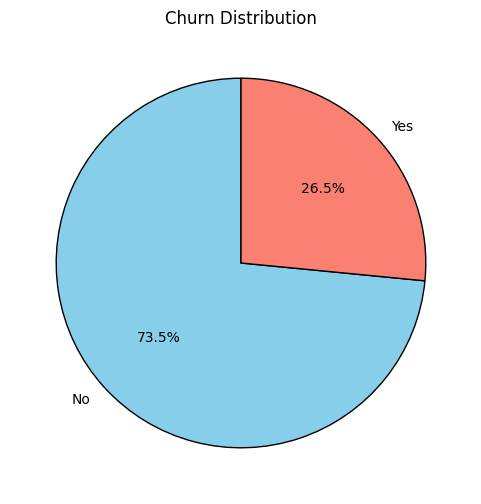

In [ ]:
# Plot churn distribution using a pie chart
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Churn Distribution")
plt.ylabel("")  # Remove default y-label
plt.show()

#### Key Insights:
- The dataset has an **imbalanced churn distribution**, with significantly more customers who did not churn.
- This imbalance may impact model training, requiring techniques like **resampling** or adjusting class weights.
- A **26.5% churn rate** suggests that a considerable portion of customers are leaving, indicating potential business challenges.

## Data Prepocessing

### Encoding Categorical Variables

In [ ]:
#printing unique values in all the columns
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
    if col not in numerical_features:
      print(col, df[col].unique())
      print("_"*50)

gender ['Female' 'Male']
__________________________________________________
SeniorCitizen [0 1]
__________________________________________________
Partner ['Yes' 'No']
__________________________________________________
Dependents ['No' 'Yes']
__________________________________________________
PhoneService ['No' 'Yes']
__________________________________________________
MultipleLines ['No phone service' 'No' 'Yes']
__________________________________________________
InternetService ['DSL' 'Fiber optic' 'No']
__________________________________________________
OnlineSecurity ['No' 'Yes' 'No internet service']
__________________________________________________
OnlineBackup ['Yes' 'No' 'No internet service']
__________________________________________________
DeviceProtection ['No' 'Yes' 'No internet service']
__________________________________________________
TechSupport ['No' 'Yes' 'No internet service']
__________________________________________________
StreamingTV ['No' 'Yes' 'No internet 

**1. Binary Encoding (Label Encoding)**

For **binary categorical variables** (two unique values), I replaced them with `0` and `1`:
- `gender` → {'Female': 0, 'Male': 1}
- `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, `Churn` → {'No': 0, 'Yes': 1}

In [ ]:
# Label Encoding for Binary Categorical Variables
label_encoding_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
df[label_encoding_cols] = df[label_encoding_cols].replace({'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1})

**2. One-Hot Encoding**

For multi-category variables, I applied **One-Hot Encoding**, dropping the first category to avoid multicollinearity:

**Encoded Columns:**
- MultipleLines  
- InternetService  
- OnlineSecurity  
- OnlineBackup  
- DeviceProtection  
- TechSupport  
- StreamingTV  
- StreamingMovies  
- Contract  
- PaymentMethod

In [ ]:
# One-Hot Encoding for Multi-Category Categorical Variables
one_hot_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)  # Drop first category to avoid multicollinearity

# Display first few rows to verify encoding
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1            False                    

In [ ]:
# Convert boolean columns to integers (0 and 1)
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Display first few rows to verify changes
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0   
1                0                    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

### Feature Correlation

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr()

# Sort correlations with respect to Churn
churn_correlation = corr_matrix['Churn'].sort_values(ascending=False)

# Display top correlated features
print(churn_correlation)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


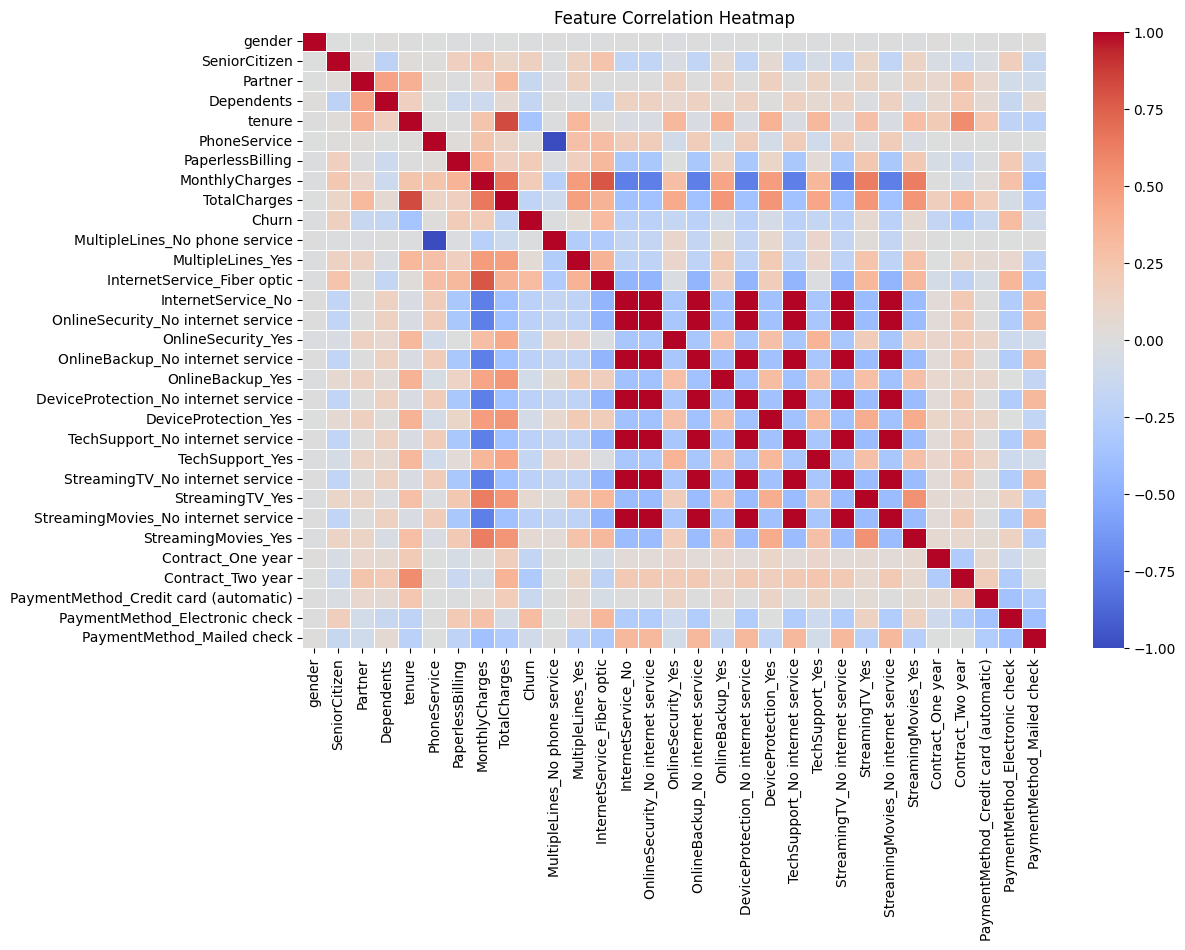

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Key Insights**
- Customers with **fiber optic internet, electronic check payments, and high monthly charges** are more likely to churn.
- Long-term contracts (**two-year contracts**), **higher tenure**, and **added security/support services** reduce churn.
- **Online security, tech support, and total charges** negatively correlate with churn, suggesting customers using these services tend to stay.

These insights guide **feature selection** for predictive modeling and targeted customer retention strategies.

### Checking Linearity

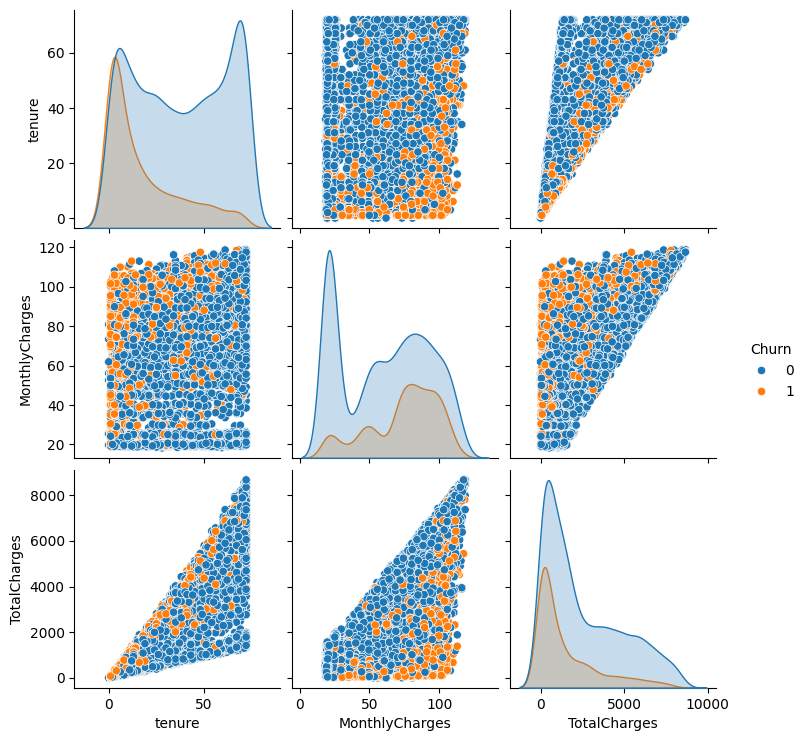

In [ ]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

### Feature Scaling  

To ensure the numerical features are on a comparable scale and robust to outliers, I applied **Robust Scaling** to the following columns:  

- **tenure**  
- **MonthlyCharges**  
- **TotalCharges**  

**Why Robust Scaling?**

Robust Scaling was chosen because **TotalCharges** is **right-skewed** and may contain outliers. Unlike standard scaling (which normalizes data to have zero mean and unit variance), **RobustScaler** scales features using the **interquartile range (IQR)**, making it more resistant to outliers.  

This ensures that the numerical features are well-scaled without being affected by extreme values.  


In [ ]:
# Columns to scale
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize RobustScaler
robust_scaler = RobustScaler()

# Apply RobustScaler before splitting
df[numerical_cols] = robust_scaler.fit_transform(df[numerical_cols])

### **Training and Test Data Split**

In [ ]:
# Define features (X) and target variable (y)
X = df.drop(columns=['Churn'])  # Independent variables
y = df['Churn']  # Target variable

In [ ]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Verify split sizes
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (5634, 30)
Testing set size: (1409, 30)


In [ ]:
# Check target distribution
print("Training target distribution:\n", y_train.value_counts(normalize=True))
print("Testing target distribution:\n", y_test.value_counts(normalize=True))

Training target distribution:
 Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Testing target distribution:
 Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


### Handle Imbalanced Data


Oversampling (SMOTE)

Synthetic Minority Oversampling Technique (SMOTE) to generate synthetic samples for the minority class.

In [ ]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply to training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Resampled target distribution:\n", y_train_resampled.value_counts(normalize=True))

Resampled target distribution:
 Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


## Machine Learnng Models

### Random Forest Model

**Process of Random Forest**

1️⃣ Bootstrap Sampling (Bagging)

The dataset is randomly sampled with replacement to create multiple subsets.
Each subset is used to train an individual decision tree.

2️⃣ Random Feature Selection

Instead of considering all features at each node, only a random subset of features is used.
This reduces correlation between trees and improves generalization.

3️⃣ Training Multiple Decision Trees

Each tree is trained independently using a different subset of data.
Since trees are built on different data, they have diverse predictions.

4️⃣ Majority Voting (For Classification)

Each tree in the forest makes a prediction.
The majority vote (most frequent class) is chosen as the final prediction.

5️⃣ Averaging Predictions (For Regression)

Instead of voting, the average of all tree predictions is taken.


####  Train Random Forest with Resampled Data

In [ ]:
# Initialize Random Forest with regularization to reduce overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=10,            # Limit tree depth to prevent too much branching
    min_samples_split=10,    # Require more samples before a node splits
    min_samples_leaf=5,      # Require more samples in leaf nodes
    max_features="sqrt",     # Reduce the number of features considered per split
    random_state=42
)

In [ ]:
# Train the model with resampled data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

#### Make Predictions on Test Set

In [ ]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Get predicted probabilities for ROC-AUC
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

### Evaluate Random Forest Model

In [ ]:
# Evaluate training accuracy
train_acc = rf_model.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {train_acc:.4f}")

# Evaluate test accuracy
test_acc = rf_model.score(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.8652
Test Accuracy: 0.7630


In [ ]:
# Perform Cross-Validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Accuracy: 0.8200


####  Classification Report

In [ ]:
# Print classification report
print("\n📌 Random Forest Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


📌 Random Forest Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.54      0.70      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



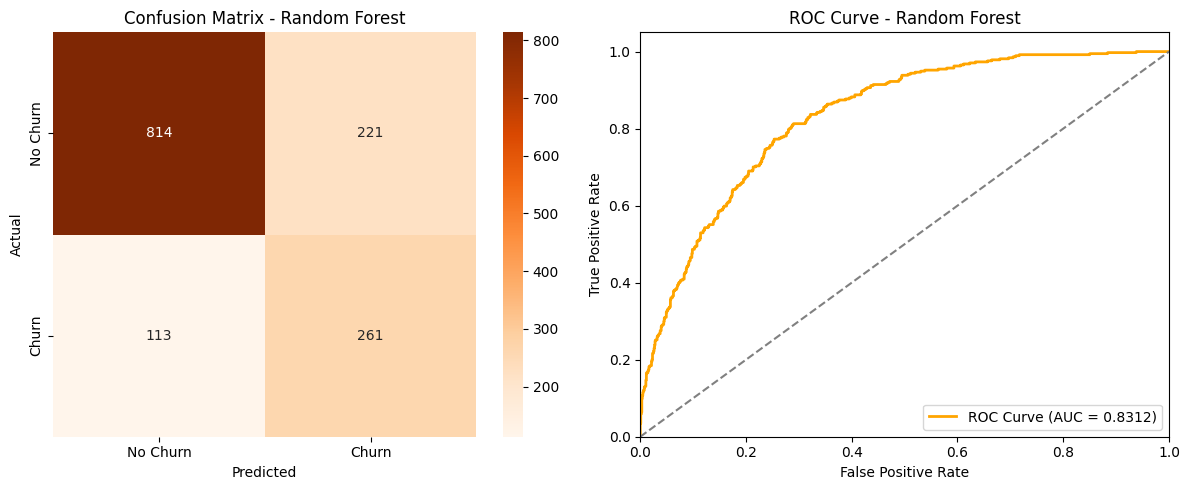

In [ ]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Compute ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
roc_auc = auc(fpr, tpr)

# Create Figure with 2 Subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 📌 **Confusion Matrix Plot**
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["No Churn", "Churn"],
            yticklabels=["No Churn", "Churn"], ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("Confusion Matrix - Random Forest")

# 📌 **ROC Curve Plot**
axes[1].plot(fpr, tpr, color="orange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
axes[1].plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonal Line (Random Guess)
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Random Forest")
axes[1].legend(loc="lower right")

# Show the plots
plt.tight_layout()
plt.show()

#### Feature Importance

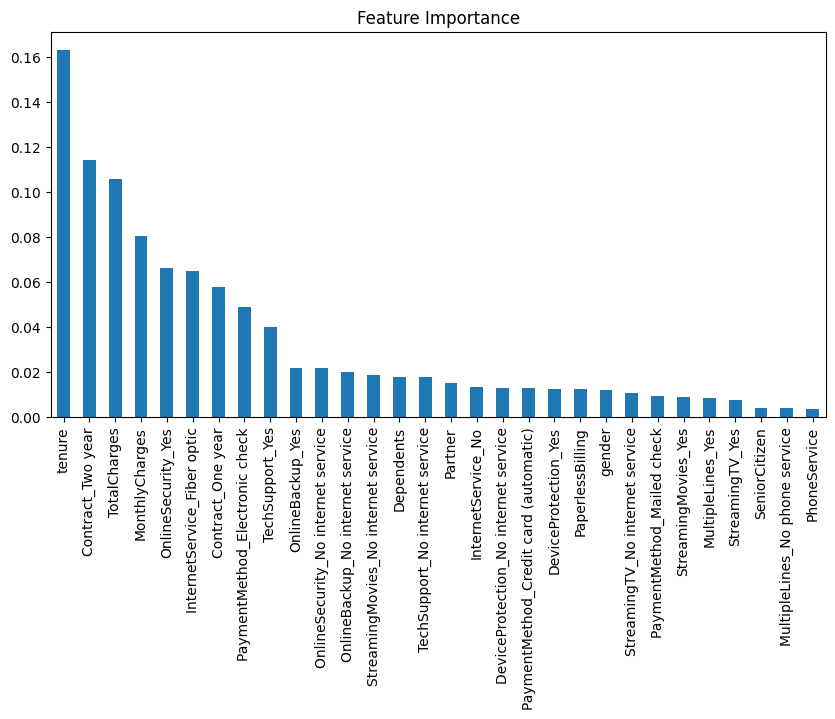

In [ ]:
# Get feature importances
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Plot feature importance
importances.sort_values(ascending=False).plot(kind="bar", figsize=(10, 5), title="Feature Importance")
plt.show()

### Overfitting Analysis

####  Learning Curve: Train vs. Validation Performance

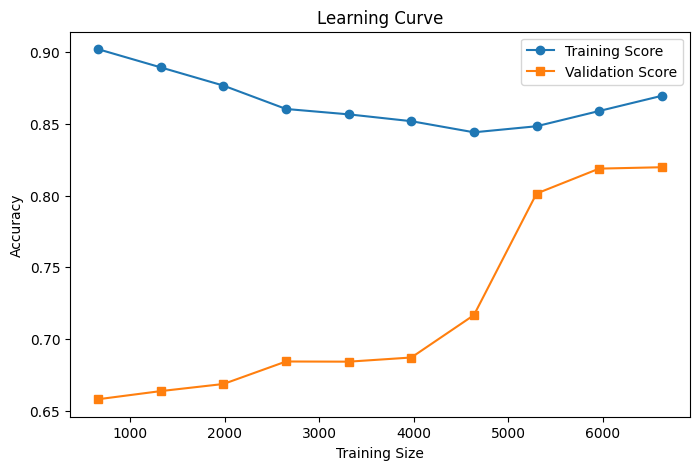

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and std deviation
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Score", marker="o")
plt.plot(train_sizes, test_mean, label="Validation Score", marker="s")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

### Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None]
}

In [ ]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

In [ ]:
# Randomized Search with 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations
    cv=5,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

In [ ]:
# Fit on resampled data
random_search.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [ ]:
# Print best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}


In [ ]:
# Train with best hyperparameters
best_rf = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_features=None, min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [ ]:
# Predict on test set
y_pred_best_rf = best_rf.predict(X_test)

In [ ]:
# Print classification report
print("\n📌 Tuned Random Forest Performance:")
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


📌 Tuned Random Forest Performance:
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.67      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



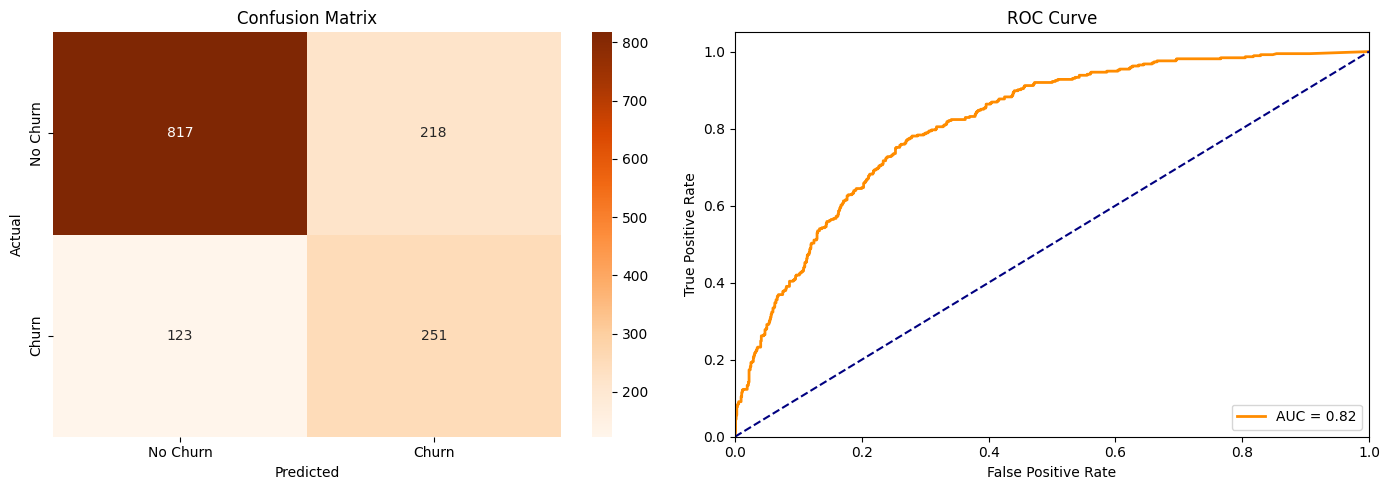

In [ ]:
# Get predicted probabilities for ROC-AUC
y_probs_best_rf = best_rf.predict_proba(X_test)[:, 1]

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_best_rf)

# Create a figure with 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plot Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"], ax=ax[0])
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
ax[0].set_title("Confusion Matrix")

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs_best_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
ax[1].plot(fpr, tpr, color="darkorange", lw=2, label=f"AUC = {roc_auc:.2f}")
ax[1].plot([0, 1], [0, 1], color="navy", linestyle="--")
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].set_title("ROC Curve")
ax[1].legend(loc="lower right")

# Show the plots
plt.tight_layout()
plt.show()

### Support Vector Machine (SVM) with an RBF kernel

In [ ]:
# Initialize and train SVM with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train_resampled, y_train_resampled)

SVC(probability=True, random_state=42)

### Make Predictions

In [ ]:
y_pred_svm = svm_model.predict(X_test)
y_probs_svm = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

### Evaluate the Model

In [ ]:
# Print evaluation metrics
print("\n📌 SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


📌 SVM Performance:
Accuracy: 0.7771469127040455

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1035
           1       0.57      0.64      0.60       374

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409



#### Confusion Matrix & ROC Curve

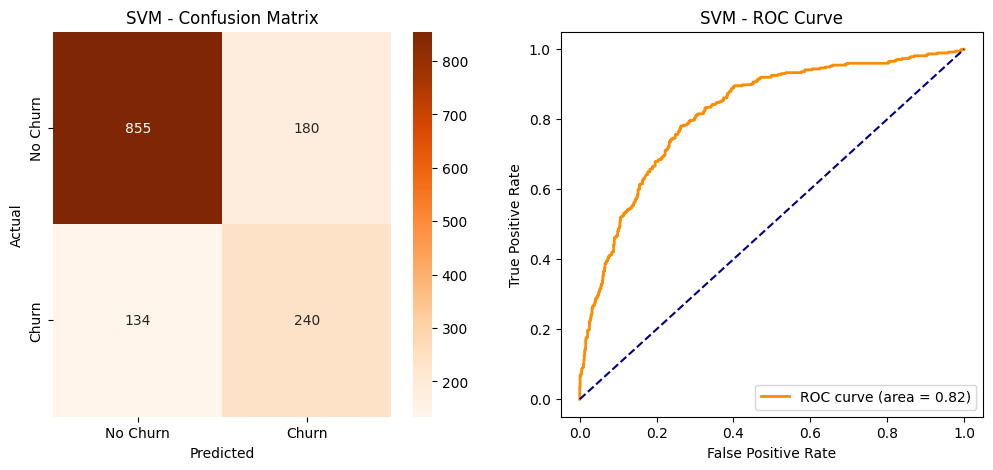

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Compute ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_probs_svm)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix & ROC Curve side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"], ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("SVM - Confusion Matrix")

# ROC Curve
axes[1].plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = {:.2f})".format(roc_auc))
axes[1].plot([0, 1], [0, 1], color="navy", linestyle="--")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("SVM - ROC Curve")
axes[1].legend(loc="lower right")

plt.show()

### XGBoost Model

In [ ]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

# Train XGBoost model on resampled data
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)
y_probs_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC

In [ ]:
# Print metrics
print("\n📌 XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


📌 XGBoost Performance:
Accuracy: 0.7601135557132718

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.71      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409


Confusion Matrix:
 [[804 231]
 [107 267]]


#### Confusion Matrix & ROC Curve

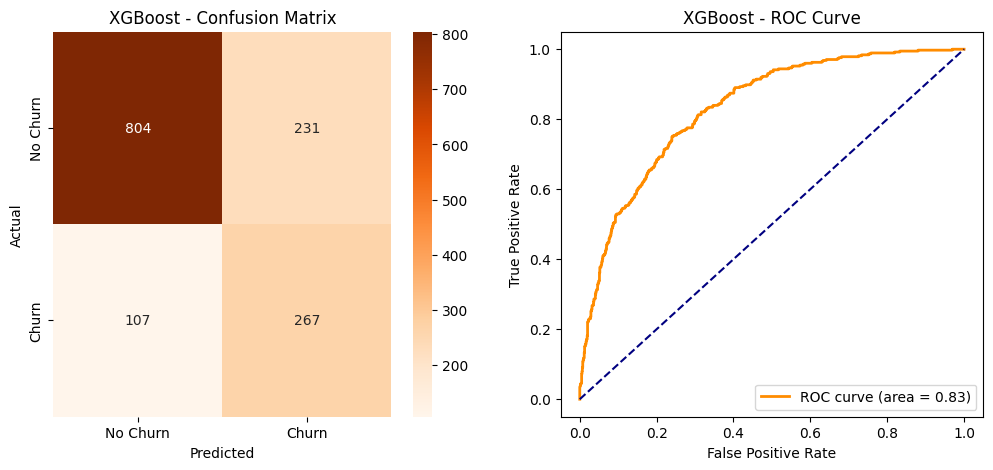

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Compute ROC-AUC
fpr, tpr, _ = roc_curve(y_test, y_probs_xgb)
roc_auc = auc(fpr, tpr)

# Plot Confusion Matrix & ROC Curve side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"], ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("XGBoost - Confusion Matrix")

# ROC Curve
axes[1].plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (area = {:.2f})".format(roc_auc))
axes[1].plot([0, 1], [0, 1], color="navy", linestyle="--")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("XGBoost - ROC Curve")
axes[1].legend(loc="lower right")

plt.show()

### Hyperparameter Tuning for XGBoost (RandomizedSearchCV)

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500, 700],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7, 10],  # Depth of trees
    'min_child_weight': [1, 3, 5],  # Minimum sum of weights required in a child
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used per tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features used per tree
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction to split a node
}

In [ ]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

In [ ]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit to training data
random_search.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 300, 500, 700],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
# Get best parameters
best_params = random_search.best_params_
print("\n✅ Best Hyperparameters:", best_params)

# Train XGBoost with best hyperparameters
best_xgb = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
best_xgb.fit(X_train_resampled, y_train_resampled)


✅ Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 700, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.2, 'gamma': 0.1, 'colsample_bytree': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=700,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Evaluate Tuned Model

In [ ]:
# Make predictions
y_pred_best_xgb = best_xgb.predict(X_test)

# Print performance metrics
print("\n📌 XGBoost Performance After Tuning:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_xgb))


📌 XGBoost Performance After Tuning:
Accuracy: 0.7530163236337828

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1035
           1       0.53      0.60      0.56       374

    accuracy                           0.75      1409
   macro avg       0.69      0.70      0.69      1409
weighted avg       0.76      0.75      0.76      1409


Confusion Matrix:
 [[838 197]
 [151 223]]


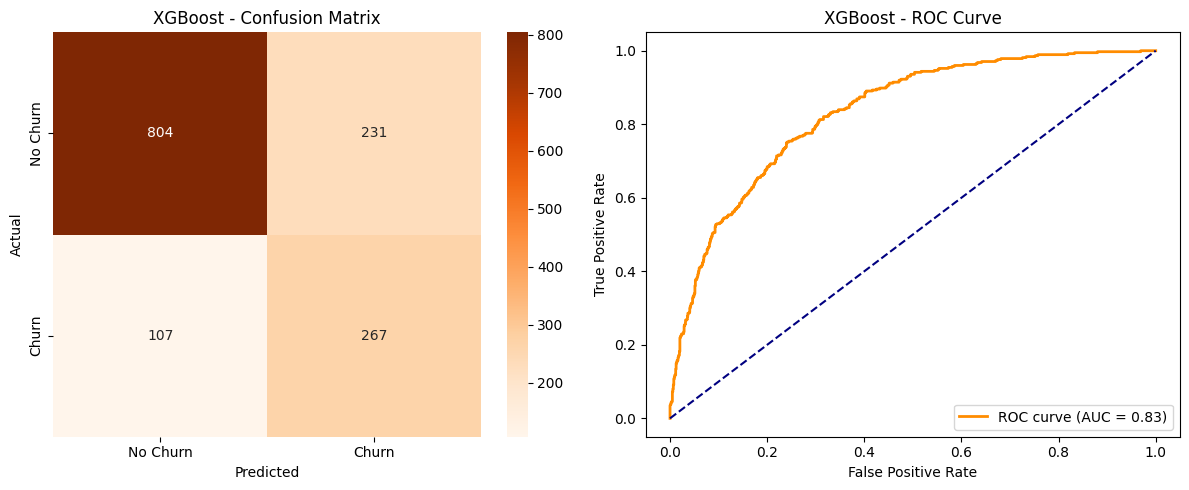

In [ ]:
# Create side-by-side plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# 🔹 Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"], ax=ax[0])
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
ax[0].set_title("XGBoost - Confusion Matrix")

# 🔹 ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_probs_xgb)
roc_auc = auc(fpr, tpr)
ax[1].plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc))
ax[1].plot([0, 1], [0, 1], color="navy", linestyle="--")  # Diagonal line
ax[1].set_xlabel("False Positive Rate")
ax[1].set_ylabel("True Positive Rate")
ax[1].set_title("XGBoost - ROC Curve")
ax[1].legend(loc="lower right")

# Show both plots together
plt.tight_layout()
plt.show()